<a href="https://colab.research.google.com/github/ZamWayne/Machine-Learning-Task/blob/main/Tugas%2011/Azam_A_LeNetMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    :Azam Auliyaa

NIM     :1103204205

Dataset :MNIST

https://chatgpt.com/share/c6e3c65e-6c4a-4664-afcd-c3585c8eb651

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Normalisasi data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [4]:
# Model LeNet
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 35s 67ms/step - loss: 0.3034 - accuracy: 0.9132 - val_loss: 0.0989 - val_accuracy: 0.9690
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0865 - accuracy: 0.9735 - val_loss: 0.0632 - val_accuracy: 0.9808
Epoch 3/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0515 - val_accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0478 - val_accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 6/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch 7/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0321 - val_accuracy:

313/313 [==============================] - 2s 7ms/step


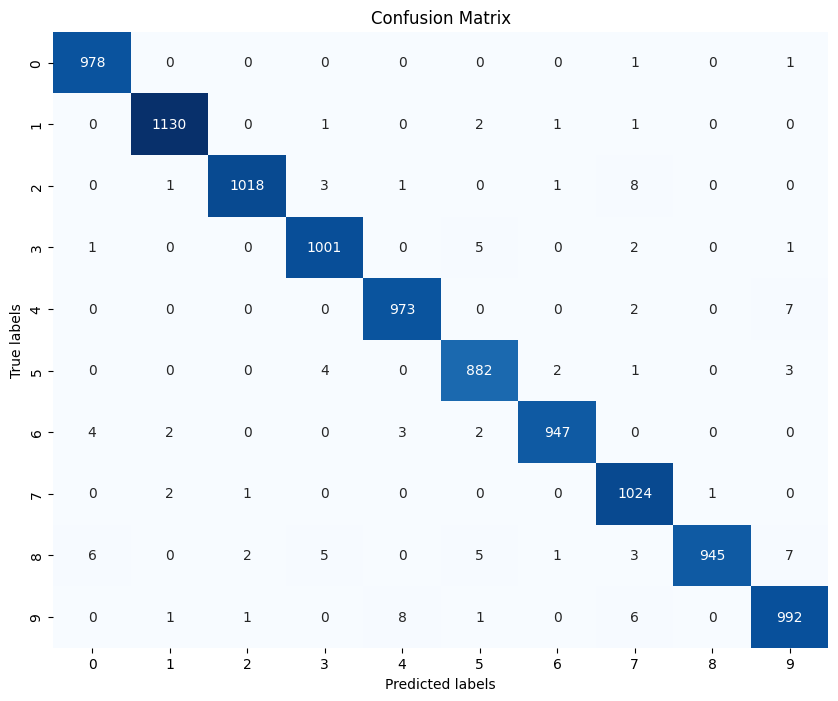

In [7]:
# Prediksi label kelas untuk data uji
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

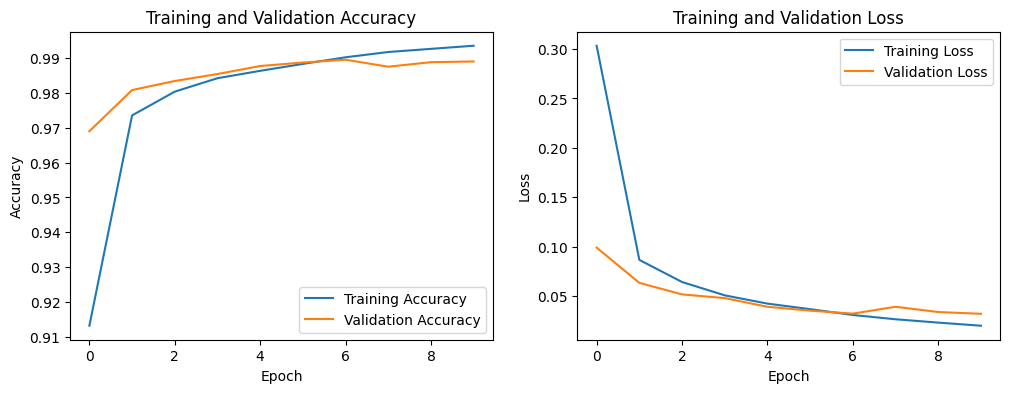

In [8]:
# Menampilkan kurva akurasi dan loss
plt.figure(figsize=(12, 4))

# Plot kurva akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot kurva loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()